# Lab 6 CNNS

### Eli Laird

## Introduction

It is estimated that 23,820 adults in the United States will be diagnosed with brain cancer in 2019. Brain and central nervous system cancer is the tenth leading cause of death for men and women in the United States. The 5-year survival rate for men and women with brain cancer is estimated to be between 34 and 36 percent [1]. Early detection of brain tumors is critical in effectively treating patients with brain tumors. In this lab, we will investigate methods for detecting brain tumors using deep Convolutional Neural Networks and Magnetic Resonance Imaging (MRI).

## Business Understanding


##### **Motivation**

The ability to detect and treat a low-grade glioma, today, before it progresses to Glioblastoma multiforme, i.e. brain cancer, can be the difference between life and death [2]. In the past decade, advancements in medical imaging have greatly improved the ability of doctors to diagnose brain tumors without performing exploratory surgery. Exploratory surgery is invasive and introduces many risks to the patient. Magnetic Resonance Imaging, MRI, and Computer-Assisted Tools, CAT scans, are some of the most popular medical imaging techniques used to diagnose brain tumors. These imaging techniques are also used in tumor segmentation and operation planning to provide precision and diagnosis consistency. Using Deep Learning to assist in the diagnosing process can improve the precision of a diagnosis by a considerable amount. In a study of brain tumor diagnosis by the Royal College of Physicians, 10% of patients, in a Scottish audit, had negative CT scans, i.e. a false negative claiming there were no signs of a brain tumor when in fact a brain tumor existed [3]. A negative scan can prove to be fatal as the undetected tumor grows to a higher grade state and will eventually spread to an unrecoverable state. Using Deep Learning to assist in brain tumor diagnosis aims to alleviate this problem by combining the abilities of Convolutional Neural Networks and the domain knowledge of general practictioners to increase the reliability of diagnosing brain tumors. 

##### **Solution**

Convolutional Neural Networks (CNNs) work by applying layers of convolutions to an image to learn specific features of that image. These convolutions apply various filters over the image that correspond to these specific features. For example, a certain filter can be trained to highlight sharp edges in the image, other filters can be learned to focuss on faces or in our case brain tumors. Our Deep Learning solution to early brain tumor detection includes feeding MRI brain scans through different convolutional neural network architectures. Each of these architectures will learn the features of the images and will identify brain scans in which a tumor exists. This solution will allow doctors to make more reliable decisions when  diagnosing a patient with a brain tumor. This solution is not designed to diagnose patients without the assistance of the doctor, however. This solution is designed to provide the doctor with more precise information for the diagnosis and thus act as an aid in order to prevent the scenario where a tumor goes undetected.

##### **Evaluation**

As mentioned before, when diagnosing patients with brain cancer, we want to minimize the amount of undetected brain tumors. This corresponds to having a low false negative rate. Having a low false negative rate is important because a diagnosis that states a patient is cancer free when the patient actually has cancer, that patient will go untreated and the cancer has a higher chance of being fatal. We also do not want to diagnose healthy patients with cancer when they are cancer free because the patient will then go through immense amounts of stress and maybe even go through unnecessary treatment. While false positives are clearly not beneficial to the patient, in the end we consider a false negative more of a detrimental cost because it involves failing to save a life. For this reason we will use the recall metric in evaluating our CNN solution. The recall metric is the ratio of correctly predicted positive observations to all observations of the class. Recall places an emphasis on minimizing false negatives and thus proves to be the most appropriate metric to evaluate our solution. Recall is defined as:

$$
\begin{align}
Recall = \frac{True Positives}{True Positives + False Negatives}
\end{align}
$$



## Data Preparation

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
import cv2
import os

In [3]:
file_path = './Brain-Tumor-Images-Dataset/full-data/'

hem_images_dir = os.listdir(file_path + 'hemmorhage_data/')
nonhem_images_dir = os.listdir(file_path + 'non_hemmorhage_data/')


hemmorhage_imgs = []
nonhemmorhage_imgs = []
labels = []
h, w = (250, 150)

#read in hemmorhage images
error_count = 0
for img in hem_images_dir:
    image = cv2.imread(file_path + 'hemmorhage_data/' + img, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (150, 250))
    try:
        hemmorhage_imgs.append(image.flatten())
        labels.append(1)
    except:
        error_count += 1
    
#read in nonhemmorage data
for img in nonhem_images_dir:
    image = cv2.imread(file_path + 'non_hemmorhage_data/' + img, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (150, 250))
    try:
        nonhemmorhage_imgs.append(image.flatten())
        labels.append(0)
    except:
        error_count += 1
        
        
data = hemmorhage_imgs + nonhemmorhage_imgs
data = np.array(data)
labels = np.array(labels)

#shuffle data
rstate = np.random.get_state()
np.random.shuffle(data)
np.random.set_state(rstate)
np.random.shuffle(labels)

print("{} Images failed to read".format(error_count))
print("Image size:", data[0].shape)
print("Image count:", len(data))

0 Images failed to read
Image size: (37500,)
Image count: 200


#### Data Expansion using Image Transformations

In [4]:
#create new sample data
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=360, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None)

#expand dimensions
data = np.expand_dims(data.reshape((-1, h, w)), axis=3)

datagen.fit(data)

new_hemmorhages = datagen.flow(data, labels, batch_size=1000)

Using TensorFlow backend.


In [5]:
i = 0
for tmp in new_hemmorhages:
    if i == 1000: break
    i = i+1
    if i % 50 == 0: print("{} images added".format(i))
    #plt.imshow(tmp[0][0].squeeze(),cmap='bone')
    #plt.title(tmp[1][0])
    data = np.vstack((data,np.expand_dims(tmp[0][0].squeeze().reshape((-1,h,w)), axis=3)))
    labels = np.append(labels,tmp[1][0])
    

50 images added
100 images added
150 images added
200 images added
250 images added
300 images added
350 images added
400 images added
450 images added
500 images added
550 images added
600 images added
650 images added
700 images added
750 images added
800 images added
850 images added
900 images added
950 images added
1000 images added


In [6]:
import pickle 

#store image dataset in pickle file
pickle.dump(data, open('image_data.p', 'wb'))

In [ ]:
import pickle

#load data from pickle file
data = pickle.load(open('image_data.p', 'rb'))

In [7]:
# select random images to visualize
import random
random.seed(1)

classes = {1:"Tumor", 0:"No Tumor"}

# function to plot images in grid like fashion
def plot_gallery(images, title, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    rand_sample = random.sample(range(0,images.shape[0]), k=18)
    for n,i in enumerate(rand_sample):
        plt.subplot(n_row, n_col, n + 1)
        plt.imshow(images[i].reshape((h,w)))
        plt.title(classes[title[i]], size=12)
        plt.xticks(())
        plt.yticks(())
        
        


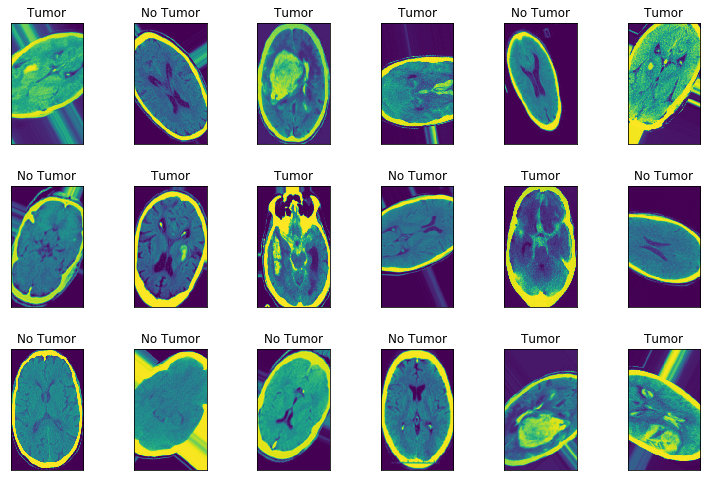

In [8]:
# plot random images
plot_gallery(data, labels, h,w)

In [9]:
print("Image Count {}".format(data.shape[0]))
print("Label Count {}".format(labels.shape[0]))

Image Count 1200
Label Count 1200


Text(0.5, 1.0, 'Class Distribution')

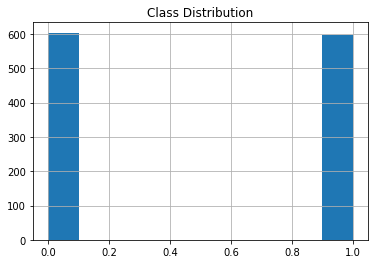

In [10]:
# Class distributions
labels_df = pd.DataFrame(data=labels)
labels_df.hist()
plt.title("Class Distribution")

### Dividing Data using 5-Fold Cross Validation

For this classificatin task I chose to use 5-fold Cross Validation in order to split up my data into training and test sets. From the start, we started out with only 200 instances in the dataset. We used image transformations to expand our data to 1200 instances. Because of the small size of the dataset, there is a large amount of variance in the predictions. Cross Validation allows us to select training and testing sets while decreasing the variance overall with the 5-folds. Here we will split the data into 5 folds and will fit each Convolutional Neural Network on each of the folds. Each iteration, the CNN model builds off of the progress of the previous iteration. After fitting each CNN model on the 5 folds, we will evaluate our model on a test set created using an 80-20 split.

In [12]:
import sklearn
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, random_state=42).split(data, labels)



## Convolutional Neural Networks

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras_metrics
keras.__version__

from sklearn.metrics import recall_score

#### AlexNet-Like Architecture

In [ ]:
alexnet = Sequential()

alexnet.add(Conv2D(filters=32,
                   input_shape = (h,w,1),
                   kernel_size= (3,3),
                   padding='same',
                   activation='relu',
                   data_format='channels_last'))

alexnet.add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    padding='same',
                    activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last'))

alexnet.add(Dropout(0.25))
alexnet.add(Flatten())
alexnet.add(Dense(128, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(2, activation='softmax'))

alexnet.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=[keras_metrics.recall()])




In [19]:
alexnet_scores = []
for k, (train, test) in enumerate(kfold):
    alexnet.fit(data[train], labels[train],
                batch_size=32, 
                epocs=100, shuffle=True, verbose=1,
                validation_data=(data[test],labels[test]))
    yhat = alexnet.predict_classes(labels, verbose=0)
    yhat = yhat[:,0]
    recall = recall_score(data[test], yhat)
    alexnet_scores.append(recall)
    print("[%d] Recall Score %f" % k, recall)

NameError: name 'alexnet' is not defined

## References


* [1] https://www.cancer.net/cancer-types/brain-tumor/statistics
* [2] https://weillcornellbrainandspine.org/early-detection-can-be-key-surviving-brain-tumor
* [3] https://jnnp.bmj.com/content/75/suppl_2/ii18